# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [8]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 30
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [9]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0720 22:14:37.536288  3908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0720 22:14:37.540880  3908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0720 22:14:37.571795  3908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 22:14:37.574222  3908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 22:14:37.578529  3908 

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0720 22:14:37.941448  3908 deprecation.py:323] From C:\Users\weihs\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 14s 276us/step - loss: 2.0441 - acc: 0.2533 - val_loss: 1.9907 - val_acc: 0.2766
Epoch 2/30
50000/50000 [==============================] - 14s 273us/step - loss: 1.8376 - acc: 0.3394 - val_loss: 1.8236 - val_acc: 0.3468
Epoch 3/30
50000/50000 [==============================] - 14s 273us/step - loss: 1.7389 - acc: 0.3778 - val_loss: 1.7245 - val_acc: 0.3686
Epoch 4/30
50000/50000 [==============================] - 14s 277us/step - loss: 1.6774 - acc: 0.4020 - val_loss: 1.7482 - val_acc: 0.3528
Epoch 5/30
50000/50000 [==============================] - 14s 287us/step - loss: 1.6211 - acc: 0.4223 - val_loss: 1.6068 - val_acc: 0.4285
Epoch 6/30
50000/50000 [==============================] - 14s 288us/step - loss: 1.5805 - acc: 0.4379 - val_loss: 1.6519 - val_acc: 0.3962
Epoch 7/30
50000/50000 [==============================] - 15s 304us/step - loss: 1.5504 - acc: 0.4481 - val_loss: 1.

Epoch 21/30
50000/50000 [==============================] - 16s 325us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/30
50000/50000 [==============================] - 16s 326us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/30
50000/50000 [==============================] - 16s 325us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/30
50000/50000 [==============================] - 16s 325us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/30
50000/50000 [==============================] - 16s 323us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/30
50000/50000 [==============================] - 16s 324us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/30
50000/50000 [==============================] - 16s 313us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

Epoch 3/30
50000/50000 [==============================] - 18s 360us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/30
50000/50000 [==============================] - 18s 356us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/30
50000/50000 [==============================] - 18s 358us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/30
50000/50000 [==============================] - 18s 357us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/30
50000/50000 [==============================] - 18s 356us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/30
50000/50000 [==============================] - 18s 359us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/30
50000/50000 [==============================] - 18s 361us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/30
5

Epoch 23/30
50000/50000 [==============================] - 23s 461us/step - loss: 1.4401 - acc: 0.4934 - val_loss: 1.4680 - val_acc: 0.4856
Epoch 24/30
50000/50000 [==============================] - 23s 468us/step - loss: 1.4313 - acc: 0.4997 - val_loss: 1.4762 - val_acc: 0.4705
Epoch 25/30
50000/50000 [==============================] - 24s 485us/step - loss: 1.4204 - acc: 0.5022 - val_loss: 1.4980 - val_acc: 0.4703
Epoch 26/30
50000/50000 [==============================] - 23s 464us/step - loss: 1.4081 - acc: 0.5073 - val_loss: 1.4567 - val_acc: 0.4774
Epoch 27/30
50000/50000 [==============================] - 23s 461us/step - loss: 1.3945 - acc: 0.5102 - val_loss: 1.8566 - val_acc: 0.3676
Epoch 28/30
50000/50000 [==============================] - 23s 464us/step - loss: 1.3939 - acc: 0.5118 - val_loss: 1.5358 - val_acc: 0.4416
Epoch 29/30
50000/50000 [==============================] - 23s 469us/step - loss: 1.3816 - acc: 0.5168 - val_loss: 1.4540 - val_acc: 0.4884
Epoch 30/30
50000/50

50000/50000 [==============================] - 25s 495us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/30
50000/50000 [==============================] - 25s 500us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/30
50000/50000 [==============================] - 25s 497us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/30
50000/50000 [==============================] - 25s 499us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/30
50000/50000 [==============================] - 25s 507us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/30
50000/50000 [==============================] - 26s 516us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/30
50000/50000 [==============================] - 25s 506us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/30
50000/5000

Epoch 25/30
50000/50000 [==============================] - 30s 601us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/30
50000/50000 [==============================] - 29s 590us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/30
50000/50000 [==============================] - 29s 579us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/30
50000/50000 [==============================] - 29s 583us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/30
50000/50000 [==============================] - 29s 588us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/30
50000/50000 [==============================] - 29s 588us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (t

50000/50000 [==============================] - 27s 534us/step - loss: 1.5655 - acc: 0.4406 - val_loss: 1.5977 - val_acc: 0.4199
Epoch 8/30
50000/50000 [==============================] - 27s 532us/step - loss: 1.5322 - acc: 0.4511 - val_loss: 1.6413 - val_acc: 0.4077
Epoch 9/30
50000/50000 [==============================] - 27s 545us/step - loss: 1.4924 - acc: 0.4669 - val_loss: 1.6616 - val_acc: 0.4045
Epoch 10/30
50000/50000 [==============================] - 28s 560us/step - loss: 1.4716 - acc: 0.4718 - val_loss: 1.7167 - val_acc: 0.3949
Epoch 11/30
50000/50000 [==============================] - 27s 541us/step - loss: 1.4414 - acc: 0.4857 - val_loss: 1.5211 - val_acc: 0.4576
Epoch 12/30
50000/50000 [==============================] - 27s 541us/step - loss: 1.4192 - acc: 0.4922 - val_loss: 1.5170 - val_acc: 0.4499
Epoch 13/30
50000/50000 [==============================] - 27s 549us/step - loss: 1.3900 - acc: 0.5056 - val_loss: 1.5784 - val_acc: 0.4508
Epoch 14/30
50000/50000 [=========

50000/50000 [==============================] - 25s 501us/step - loss: 1.3618 - acc: 0.5266 - val_loss: 1.4313 - val_acc: 0.4945
Epoch 28/30
50000/50000 [==============================] - 25s 505us/step - loss: 1.3562 - acc: 0.5296 - val_loss: 1.4488 - val_acc: 0.4842
Epoch 29/30
50000/50000 [==============================] - 25s 496us/step - loss: 1.3500 - acc: 0.5309 - val_loss: 1.4368 - val_acc: 0.4915
Epoch 30/30
50000/50000 [==============================] - 25s 499us/step - loss: 1.3439 - acc: 0.5329 - val_loss: 1.4502 - val_acc: 0.4854
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________________________

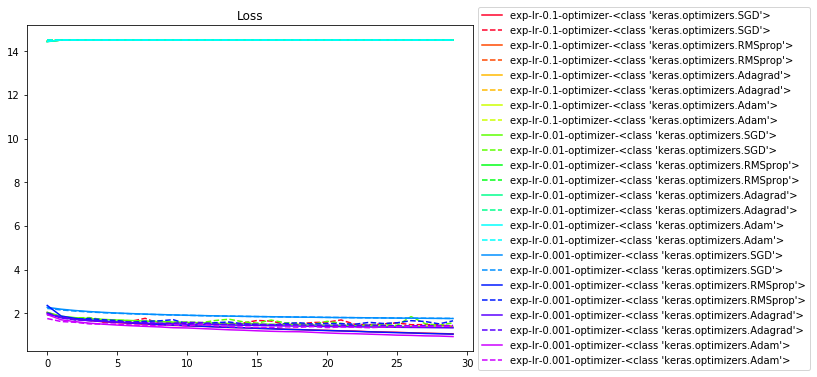

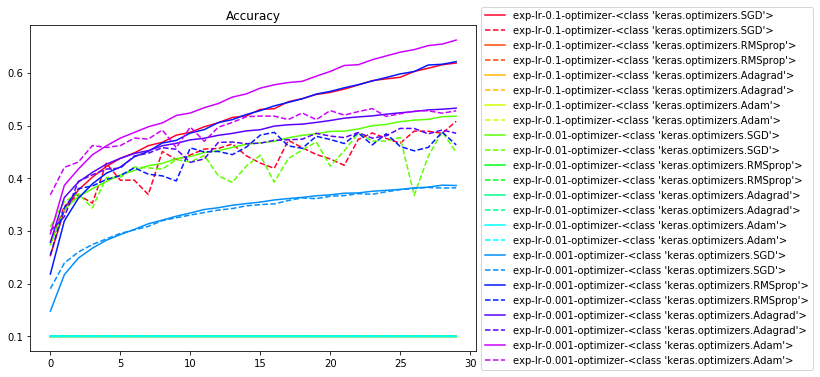

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()